In [1]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
# Read in the data
data = pd.read_csv("../coal-price-data/AirPassengers.csv")

In [4]:
data["Month"] = pd.to_datetime(data["Month"])

In [5]:
# Split train and test
train = data.iloc[: -int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2) :]

In [9]:
def plot_func(forecast: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=train["Month"], y=train["#Passengers"], name="Train")
    )
    fig.add_trace(
        go.Scatter(x=test["Month"], y=test["#Passengers"], name="Test")
    )
    fig.add_trace(go.Scatter(x=test["Month"], y=forecast, name="Forecast"))
    fig.update_layout(
        template="simple_white",
        font=dict(size=18),
        title_text=title,
        width=650,
        title_x=0.5,
        height=400,
        xaxis_title="Date",
        yaxis_title="Passenger Volume",
    )

    return fig.show()

In [7]:
# Fit model and get forecasts
model = SimpleExpSmoothing(train["#Passengers"]).fit(optimized=True)
forecasts = model.forecast(len(test))

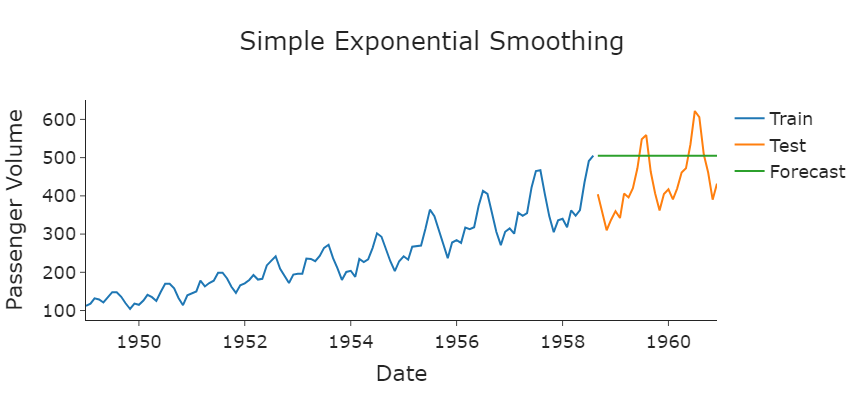

In [10]:
# Plot the forecasts
plot_func(forecasts, "Simple Exponential Smoothing")